In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [76]:
from scipy.sparse import coo_matrix, csr_matrix
import cPickle as pickle

In [25]:
def permute(adjacency_matrix, labels):
    n = adjacency_matrix.shape[0]

    adjacency_matrix = coo_matrix(adjacency_matrix)
    row = np.copy(adjacency_matrix.row)
    col = np.copy(adjacency_matrix.col)
    val = np.copy(adjacency_matrix.data)
    nnz = len(val)

    matrix = csr_matrix(coo_matrix((val, (row, col)), shape = (n, n)))
    mapping = []
    for label in set(labels):
        mapping.extend(list(np.where(labels==label)[0]))

    return csr_matrix(coo_matrix( (val, ([mapping[r] for r in row], [mapping[c] for c in col])), (n, n)))

In [4]:
topdir = '/vagrant/symbio50k'

In [5]:
ls /vagrant/symbio50k

alltools.log*                  PIC_SBM_S50_k800_bio50k.p*
alltools.py*                   PIC_Sketch_S50_k200_bio50k.p*
bio50k.edge*                   PIC_Sketch_S50_k500_bio50k.p*
K+I_SBM_S50_k200_bio50k.p*     PIC_Sketch_S50_k800_bio50k.p*
K+I_SBM_S50_k500_bio50k.p*     rand_K+I_SBM_S50_k200_bio50k.p*
K+I_SBM_S50_k800_bio50k.p*     rand_K+I_SBM_S50_k500_bio50k.p*
K+I_Sketch_S50_k200_bio50k.p*  rand_K+I_SBM_S50_k800_bio50k.p*
K+I_Sketch_S50_k500_bio50k.p*  rand_PIC_SBM_S50_k200_bio50k.p*
K+I_Sketch_S50_k800_bio50k.p*  rand_PIC_SBM_S50_k500_bio50k.p*
PIC_SBM_S50_k200_bio50k.p*     rand_PIC_SBM_S50_k800_bio50k.p*
PIC_SBM_S50_k500_bio50k.p*     run_alltools.sh*


In [54]:
fpath = os.path.join(topdir, 'bio50k.edge')
df = pd.read_csv(fpath, header=None, sep=' ')
df.columns = ['x', 'y']

In [67]:
row = df['x'].values
col = df['y'].values

nnz = len(row)
n = max(max(row), max(col)) + 1

val = np.ones(nnz)

adjacency_matrix = csr_matrix(coo_matrix((val, (row, col)), (n, n)))

In [89]:
ij = abs(row - col)
len(np.where(ij < 100)[0])

144262

In [73]:
rand_labels = np.array(range(n))
np.random.shuffle(rand_labels)

In [101]:
coo = coo_matrix(permute(adjacency_matrix, rand_labels))
ij = abs(coo.row - coo.col)
len(np.where(ij < 100)[0])

1491

In [104]:
import glob
fpaths = glob.glob('%s/*.p' % topdir)


In [105]:
for fpath in fpaths:
    labels = pickle.load(open(fpath, 'rb')).labels_
    permuted_matrix = permute(adjacency_matrix, labels)
    rows, cols = permuted_matrix.nonzero()

    ij = abs(rows - cols)
    num_block_diag = len(np.where(ij < 100)[0])
    print fpath
    print num_block_diag
    print

/vagrant/symbio50k/K+I_SBM_S50_k200_bio50k.p
3306

/vagrant/symbio50k/K+I_SBM_S50_k500_bio50k.p
2052

/vagrant/symbio50k/K+I_SBM_S50_k800_bio50k.p
1894

/vagrant/symbio50k/K+I_Sketch_S50_k200_bio50k.p
3895

/vagrant/symbio50k/K+I_Sketch_S50_k500_bio50k.p
2972

/vagrant/symbio50k/K+I_Sketch_S50_k800_bio50k.p
2589

/vagrant/symbio50k/PIC_SBM_S50_k200_bio50k.p
3400

/vagrant/symbio50k/PIC_SBM_S50_k500_bio50k.p
1985

/vagrant/symbio50k/PIC_SBM_S50_k800_bio50k.p
1794

/vagrant/symbio50k/PIC_Sketch_S50_k200_bio50k.p
3189

/vagrant/symbio50k/PIC_Sketch_S50_k500_bio50k.p
1979

/vagrant/symbio50k/PIC_Sketch_S50_k800_bio50k.p
1829

/vagrant/symbio50k/rand_K+I_SBM_S50_k200_bio50k.p
3247

/vagrant/symbio50k/rand_K+I_SBM_S50_k500_bio50k.p
2132

/vagrant/symbio50k/rand_K+I_SBM_S50_k800_bio50k.p
1909

/vagrant/symbio50k/rand_PIC_SBM_S50_k200_bio50k.p
3261

/vagrant/symbio50k/rand_PIC_SBM_S50_k500_bio50k.p
1972

/vagrant/symbio50k/rand_PIC_SBM_S50_k800_bio50k.p
1948



In [99]:
labels_fpath = os.path.join(topdir, 'K+I_SBM_S50_k200_bio50k.p')

In [97]:
labels_fpath = os.path.join(topdir, 'K+I_SBM_S50_k500_bio50k.p')

In [94]:
labels_fpath = os.path.join(topdir, 'K+I_SBM_S50_k800_bio50k.p')

In [ ]:
labels_fpath = os.path.join(topdir, 'K+I_Sketch_S50_k200_bio50k.p')

In [100]:
labels = pickle.load(open(labels_fpath, 'rb')).labels_
permuted_matrix = permute(adjacency_matrix, labels)
rows, cols = permuted_matrix.nonzero()

ij = abs(rows - cols)
len(np.where(ij < 100)[0])

3306

In [60]:
n = max(max(row), max(col)) + 1

In [7]:
from functools import partial

In [8]:
from IPython.core.display import HTML, display

In [9]:
from bokeh.plotting import figure, output_notebook, show

In [10]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader import transfer_functions as tf
from datashader.colors import Greys9

(0, 49999)

In [16]:
Greys9_r   = list(reversed(Greys9))[:-2]
background = "white"
export = partial(export_image, export_path="export", background=background)
cm     = partial(colormap_select, reverse=(background=="white"))

x_range = df['x'].min(), df['x'].max()
y_range = df['y'].min(), df['y'].max()
plot_width  = 600
plot_height = 600

In [12]:
def base_plot(tools='pan,wheel_zoom,reset', 
              x_range=x_range, 
              y_range=y_range, 
              plot_width=plot_width, 
              plot_height=plot_height,
              **plot_args):
    
    p = figure(tools=tools,
               x_range=x_range, 
               y_range=y_range,               
               plot_width=plot_width, 
               plot_height=plot_height,
               outline_line_color=None,
               min_border=0, 
               min_border_left=0, 
               min_border_right=0,
               min_border_top=0, 
               min_border_bottom=0, 
               **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

In [108]:
def create_image(x_range=x_range, y_range=y_range, plot_width=plot_width, plot_height=plot_height):
    canvas    = ds.Canvas(x_range=x_range, y_range=y_range, plot_width=plot_width, plot_height=plot_height)
    agg = canvas.points(df, 'x', 'y')
    # img = tf.interpolate(agg.where(agg > 1), cmap=["white", "darkblue"], how="eq_hist")
    img = tf.shade(agg.where(agg > 1), cmap=["white", "darkblue"], how="eq_hist")
    # img = tf.interpolate(agg, cmap=Hot, how='eq_hist')
    return tf.dynspread(img, threshold=0.1, max_px=1)

In [109]:
p = base_plot(background_fill_color=background)
export(create_image(x_range, y_range), 'Adjacency')
InteractiveImage(p, create_image)

In [ ]:
output_notebook()

In [57]:
tuple(x_range) if x_range else x_range

(0, 49999)

In [125]:
svals200_fpath  = '/vagrant/S200_k70/SingVals_200_k70_NKI-ENH_0192197_biggraphs.p'
kmodel200_fpath = '/vagrant/S200_k70/K+I_ASE_S200_k70_NKI-ENH_0192197_biggraphs.p'
svals100_fpath  = '/vagrant/S100_k70/SingVals_100_k70_NKI-ENH_0192197_biggraphs.p'
kmodel100_fpath = '/vagrant/S100_k70/K+I_ASE_S100_k70_NKI-ENH_0192197_biggraphs.p'

In [168]:
svals_fpath  = '/vagrant/bin_S100_k70/bin_SingVals_100_k70_NKI-ENH_0192197_biggraphs.p'
kmodel_fpath = '/vagrant/bin_S100_k70/bin_K+I_ASE_S100_k70_NKI-ENH_0192197_biggraphs.p'
labels_fpath = '/vagrant/bin_S100_k70/bin_labels100_k70_NKI-ENH_0192197_biggraphs.p'

In [151]:
svals_fpath  = '/vagrant/bin_S100_k70/bin_SingVals_100_k70_MRN114_M87153569_1_bg.p'
kmodel_fpath = '/vagrant/bin_S100_k70/bin_K+I_ASE_S100_k70_MRN114_M87153569_1_bg.p'
labels_fpath = '/vagrant/bin_S100_k70/bin_labels100_k70_MRN114_M87153569_1_bg.p'

In [158]:
svals_fpath  = '/vagrant/symbin_S100_k70/symbin_SingVals_100_k70_NKI-ENH_0192197_biggraphs.p'
kmodel_fpath = '/vagrant/symbin_S100_k70/symbin_K+I_ASE_S100_k70_NKI-ENH_0192197_biggraphs.p'
labels_fpath = '/vagrant/symbin_S100_k70/symbin_labels100_k70_NKI-ENH_0192197_biggraphs.p'

In [196]:
fiedler_fpath = '/vagrant/fiedler.p'

In [122]:
svals200_fpath  = '/vagrant/S200_k70/SingVals_200_k70_MRN114_M87153569_1_bg.p'
kmodel200_fpath = '/vagrant/S200_k70/K+I_ASE_S200_k70_MRN114_M87153569_1_bg.p'
svals100_fpath  = '/vagrant/S100_k70/SingVals_100_k70_MRN114_M87153569_1_bg.p'
kmodel100_fpath = '/vagrant/S100_k70/K+I_ASE_S100_k70_NKI-ENH_0192197_biggraphs.p'

In [197]:
labels_fpath = '/vagrant/labels50_k100_hsb_d50000_blocks100.p'

In [3]:
import cPickle as pickle

In [126]:
with open(svals200_fpath) as f:
    svals200 = pickle.load(f)
with open(kmodel200_fpath) as f:
    kmodel200 = pickle.load(f)

with open(svals100_fpath) as f:
    svals100 = pickle.load(f)
with open(kmodel100_fpath) as f:
    kmodel100 = pickle.load(f)

In [159]:
with open(svals_fpath) as f:
    svals = pickle.load(f)
with open(kmodel_fpath) as f:
    kmodel = pickle.load(f)
with open(labels_fpath) as f:
    labels = pickle.load(f)

In [164]:
with open(fiedler_fpath) as f:
    fiedler = pickle.load(f)

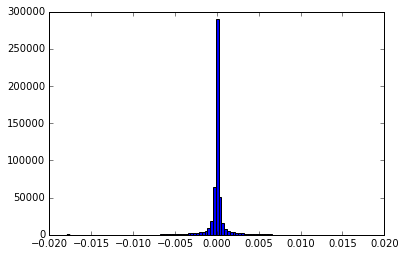

In [167]:
plt.hist(fiedler, 100);

In [4]:
labels_fpath = '/vagrant/hsb_results/labels50_k1000_bio500k.p'

In [5]:
with open(labels_fpath) as f:
    labels = pickle.load(f)

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pylab as plt

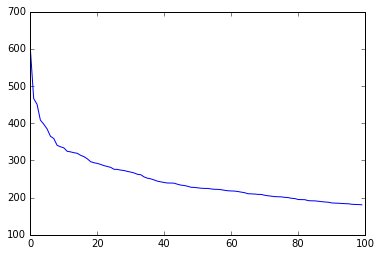

In [160]:
plt.plot(svals)

In [8]:
len(labels)

500000

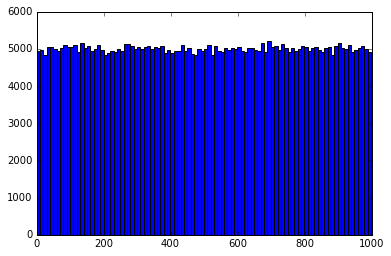

In [13]:
plt.hist(labels, 100);

In [156]:
labels_list = sorted(list(set(labels)))
for label in set(labels_list):
    print '[%2d] : %d' %  (label, len(labels[labels==label]))

[ 0] : 812087
[ 1] : 218
[ 2] : 840
[ 3] : 1752
[ 4] : 457
[ 5] : 967
[ 6] : 575
[ 7] : 1522
[ 8] : 138
[ 9] : 363
[10] : 992
[11] : 169
[12] : 1244
[13] : 927
[14] : 825
[15] : 172
[16] : 1895
[17] : 635
[18] : 453
[19] : 928
[20] : 129
[21] : 972
[22] : 743
[23] : 1676
[24] : 598
[25] : 855
[26] : 1108
[27] : 428
[28] : 112
[29] : 125
[30] : 862
[31] : 2529
[32] : 1478
[33] : 188
[34] : 892
[35] : 142
[36] : 405
[37] : 832
[38] : 996
[39] : 854
[40] : 110
[41] : 1461
[42] : 727
[43] : 319
[44] : 381
[45] : 805
[46] : 1767
[47] : 1633
[48] : 729
[49] : 1331
[50] : 679
[51] : 1001
[52] : 375
[53] : 152
[54] : 335
[55] : 203
[56] : 803
[57] : 76
[58] : 482
[59] : 637
[60] : 787
[61] : 780
[62] : 2401
[63] : 324
[64] : 592
[65] : 841
[66] : 215
[67] : 110
[68] : 771
[69] : 1109


## Using matrix market format

In [3]:
fpath = '/vagrant/human-large/NKI-ENH_0192197_biggraphs.mm'

In [4]:
df = pd.read_csv(fpath, header=None, sep=' ')
df.columns = ['x', 'y', 'z']

In [5]:
sample = df.sample(1000000)

In [6]:
len(sample)

1000000

In [7]:
from scipy.sparse import coo_matrix, csr_matrix

In [8]:
import scipy.sparse.linalg as splinalg

In [9]:
from sklearn.cluster import KMeans

In [99]:
div1 = matrix.sum()

216197179.0

In [95]:
matrix = matrix.dot(matrix)

In [96]:
from skylark.nla import approximate_svd, SVDParams

import networkx as nx
import numpy as np
import El

adjacency_matrix = matrix.astype(np.float64)

In [97]:
k = 10

In [98]:
U = El.Matrix(El.dTag)
s = El.Matrix(El.dTag)
V = El.Matrix(El.dTag)

params = SVDParams()
params.num_iterations = 2

U, s, V = approximate_svd(adjacency_matrix, U, s, V, k, params)
approx_s = sorted(s.ToNumPy().flatten())[::-1]
print approx_s

[57754.869919930657, 51963.718185276011, 47367.941220055611, 38728.599765350467, 37260.741914423888, 36973.984206313929, 36254.702707288299, 34480.801967544685, 32175.633169141096, 31526.851893905641]


In [80]:
eU, es, eVt = splinalg.svds(matrix, 10)

In [83]:
exact_s = sorted(es)[::-1]
print exact_s

[322.96339588675585, 306.39668537930129, 301.92058874114406, 278.60899745825117, 273.90380132930301, 272.77618536886098, 272.69893147290952, 268.50511618834634, 267.99149910386132, 266.23352233023888]


In [ ]:
U = U.ToNumPy()

num_clusters    = 500
max_iterations  = 5
num_inits       = 1
init_strategy   = 'random'

In [10]:
n = max(sample['x'].max(), sample['y'].max()) + 1

row = np.array(sample['x'].values, dtype=np.int64)
col = np.array(sample['y'].values, dtype=np.int64)
val = np.array(sample['z'].values, dtype=np.float64)
nnz = len(val)

matrix = csr_matrix(coo_matrix((val, (row, col)), shape = (n, n)))

clustering = KMeans(n_clusters = num_clusters,
                    max_iter = max_iterations,
                    n_init = num_inits,
                    init = init_strategy)
model = clustering.fit(U)
labels = model.labels_
mapping = []
for label in set(labels):
    mapping.extend(list(np.where(labels==label)[0]))

cdata = {'x' : [mapping[r] for r in row],
         'y' : [mapping[c] for c in col],
         'z' : val}
csample = pd.DataFrame(data=cdata)

In [58]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

plot_width  = int(600)
plot_height = plot_width

Loading BokehJS ...

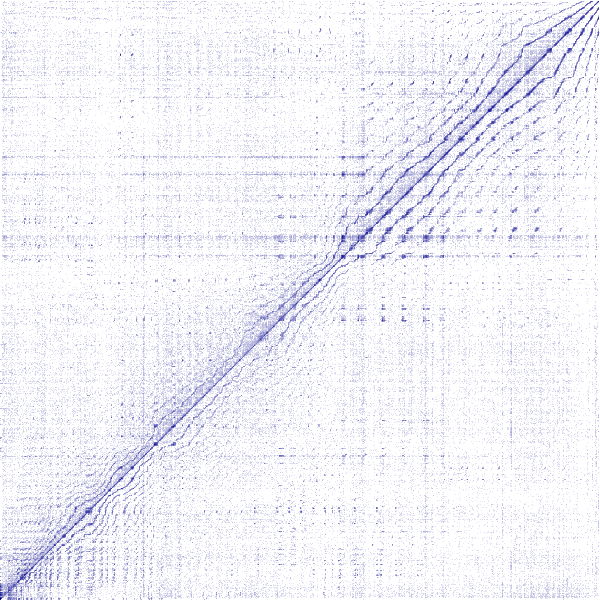

In [91]:
cx_range = csample['x'].min(), csample['x'].max()
cy_range = csample['y'].min(), csample['y'].max()

ccvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=cx_range, y_range=cy_range)
cagg = ccvs.points(csample, 'x', 'y',  ds.count('x'))
cimg = tf.interpolate(cagg, cmap=["white", 'darkblue'], how='log')
cimg

In [36]:
x_range = sample['x'].min(), sample['x'].max()
y_range = sample['y'].min(), sample['y'].max()

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(sample, 'x', 'y',  ds.mean('x'))
img = tf.interpolate(agg, cmap=["white", 'darkblue'], how='log')
img

In [12]:
def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

Loading BokehJS ...

In [14]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x', 'y',  ds.count('z'))
    img = tf.interpolate(agg, cmap=Hot, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(x_range, y_range),"Adjacency")
InteractiveImage(p, create_image)

NameError: name 'plot_width' is not defined

In [8]:
import skylark

In [17]:
data.dtype=np.int64

array([4676863693332414464, 4676944232559149056, 4611686018427387904])

## Some idea for the sizes

In [9]:
print df['x'].min(), df['x'].max()
print df['y'].min(), df['y'].max()

0 521587
1 521587


In [5]:
df.size

165007209

In [10]:
len(df)

55002403

In [11]:
len(df['x'])

55002403

In [8]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

x_range = df['x'].min(), df['x'].max()
y_range = df['y'].min(), df['y'].max()

plot_width  = int(750)
plot_height = plot_width

Loading BokehJS ...

## Working with the 50M+ point dataset...

In [9]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

### ... single image over the full dataset

In [10]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'x', 'y',  ds.count('z'))
img = tf.interpolate(agg, cmap=["white", 'darkblue'], how='log')

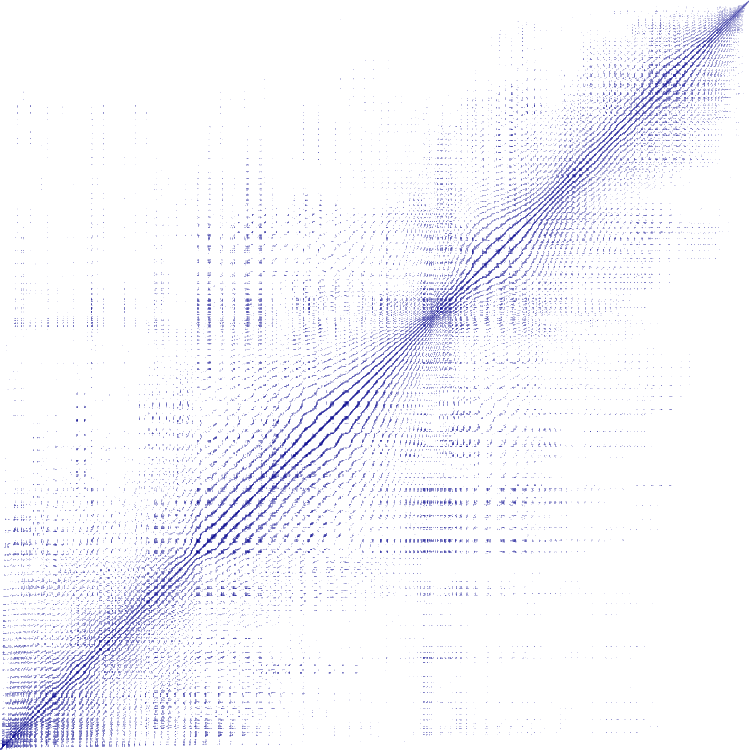

In [11]:
img


### ...interactive zooming capabilities over the full dataset

In [18]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x', 'y',  ds.count('z'))
    img = tf.interpolate(agg, cmap=Hot, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(x_range, y_range),"Adjacency")
InteractiveImage(p, create_image)